## Exploratory Data Analysis on Phone-collected Noise Pollution Data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from geopy.distance import great_circle
from geopy.distance import geodesic
from geopy.distance import distance

In [5]:
noise_data = pd.read_csv("../build_Noise-Capture-Form_1614927724.csv")
noise_data.head()

/home/lydia/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SubmissionDate,meta-instanceID,Noise-audio,Noise-Noise_Measurement,Noise-Noise_Source,Noise-Noise_Source_2,Noise-Noise_Source_3,Noise-Location-Latitude,Noise-Location-Longitude,Noise-Location-Altitude,Noise-Location-Accuracy,Noise-Comment,KEY,SubmitterID,SubmitterName,AttachmentsPresent,AttachmentsExpected,Status
0,2021-06-06T16:31:08.224Z,uuid:53658038-d7bd-4c91-b6e8-f0d46b0889e1,1622997036941.wav,44,16,NaN,NaN,0.337969,32.568804,1211.071726,3.9,NaN,uuid:53658038-d7bd-4c91-b6e8-f0d46b0889e1,36,oisaac,1,1,NaN
1,2021-06-06T16:31:07.275Z,uuid:625f8c53-41e5-4f0a-9bca-b3707d384959,1622997006078.wav,43,16,NaN,NaN,0.337965,32.568812,1233.638475,4.0,NaN,uuid:625f8c53-41e5-4f0a-9bca-b3707d384959,36,oisaac,1,1,NaN
2,2021-06-06T16:31:06.363Z,uuid:3beda636-b597-40df-95d4-55bd2592a241,1622996970925.wav,45,16,NaN,NaN,0.337991,32.568808,1195.167478,4.2,NaN,uuid:3beda636-b597-40df-95d4-55bd2592a241,36,oisaac,1,1,NaN
3,2021-06-06T16:31:05.145Z,uuid:ee1e97f0-de5c-467e-b0b8-23e336d9d410,1622996945936.wav,43,16,NaN,NaN,0.337987,32.568810,1223.859098,4.3,NaN,uuid:ee1e97f0-de5c-467e-b0b8-23e336d9d410,36,oisaac,1,1,NaN
4,2021-06-06T16:31:04.190Z,uuid:6ce3e423-844b-4de8-9173-fe190264a6de,1622996915135.wav,45,16,NaN,NaN,0.337987,32.568815,1189.348616,4.3,NaN,uuid:6ce3e423-844b-4de8-9173-fe190264a6de,36,oisaac,1,1,NaN


# Analysis of noise categories

In [6]:
noise_data.dtypes

SubmissionDate               object
meta-instanceID              object
Noise-audio                  object
Noise-Noise_Measurement      object
Noise-Noise_Source           object
Noise-Noise_Source_2         object
Noise-Noise_Source_3         object
Noise-Location-Latitude     float64
Noise-Location-Longitude    float64
Noise-Location-Altitude     float64
Noise-Location-Accuracy     float64
Noise-Comment                object
KEY                          object
SubmitterID                   int64
SubmitterName                object
AttachmentsPresent            int64
AttachmentsExpected           int64
Status                      float64
dtype: object

#### Rename columns for easier querying

In [7]:
new_col_names = {"Noise-Noise_Source": "Noise_Category"}
noise_data.rename(columns=new_col_names, inplace=True)
noise_data.head()

,SubmissionDate,meta-instanceID,Noise-audio,Noise-Noise_Measurement,Noise_Category,Noise-Noise_Source_2,Noise-Noise_Source_3,Noise-Location-Latitude,Noise-Location-Longitude,Noise-Location-Altitude,Noise-Location-Accuracy,Noise-Comment,KEY,SubmitterID,SubmitterName,AttachmentsPresent,AttachmentsExpected,Status
0,2021-06-06T16:31:08.224Z,uuid:53658038-d7bd-4c91-b6e8-f0d46b0889e1,1622997036941.wav,44,16,NaN,NaN,0.337969,32.568804,1211.071726,3.9,NaN,uuid:53658038-d7bd-4c91-b6e8-f0d46b0889e1,36,oisaac,1,1,NaN
1,2021-06-06T16:31:07.275Z,uuid:625f8c53-41e5-4f0a-9bca-b3707d384959,1622997006078.wav,43,16,NaN,NaN,0.337965,32.568812,1233.638475,4.0,NaN,uuid:625f8c53-41e5-4f0a-9bca-b3707d384959,36,oisaac,1,1,NaN
2,2021-06-06T16:31:06.363Z,uuid:3beda636-b597-40df-95d4-55bd2592a241,1622996970925.wav,45,16,NaN,NaN,0.337991,32.568808,1195.167478,4.2,NaN,uuid:3beda636-b597-40df-95d4-55bd2592a241,36,oisaac,1,1,NaN
3,2021-06-06T16:31:05.145Z,uuid:ee1e97f0-de5c-467e-b0b8-23e336d9d410,1622996945936.wav,43,16,NaN,NaN,0.337987,32.568810,1223.859098,4.3,NaN,uuid:ee1e97f0-de5c-467e-b0b8-23e336d9d410,36,oisaac,1,1,NaN
4,2021-06-06T16:31:04.190Z,uuid:6ce3e423-844b-4de8-9173-fe190264a6de,1622996915135.wav,45,16,NaN,NaN,0.337987,32.568815,1189.348616,4.3,NaN,uuid:6ce3e423-844b-4de8-9173-fe190264a6de,36,oisaac,1,1,NaN


In [8]:
noise_data = noise_data[~noise_data["Noise_Category"].isin(["Mobile-music", "Other", "car-OR-truck"])]

In [9]:
noise_data["Noise_Category"] = noise_data["Noise_Category"].astype("int64")
noise_data.dtypes

SubmissionDate               object
meta-instanceID              object
Noise-audio                  object
Noise-Noise_Measurement      object
Noise_Category                int64
Noise-Noise_Source_2         object
Noise-Noise_Source_3         object
Noise-Location-Latitude     float64
Noise-Location-Longitude    float64
Noise-Location-Altitude     float64
Noise-Location-Accuracy     float64
Noise-Comment                object
KEY                          object
SubmitterID                   int64
SubmitterName                object
AttachmentsPresent            int64
AttachmentsExpected           int64
Status                      float64
dtype: object

In [10]:
category_gb = noise_data.groupby(by="Noise_Category").count()
category_gb

,SubmissionDate,meta-instanceID,Noise-audio,Noise-Noise_Measurement,Noise-Noise_Source_2,Noise-Noise_Source_3,Noise-Location-Latitude,Noise-Location-Longitude,Noise-Location-Altitude,Noise-Location-Accuracy,Noise-Comment,KEY,SubmitterID,SubmitterName,AttachmentsPresent,AttachmentsExpected,Status
Noise_Category,,,,,,,,,,,,,,,,,
1,2101,2101,2101,2088,1589,1053,2101,2101,2101,2101,8,2101,2101,2101,2101,2101,0
2,2012,2012,2012,1998,267,70,2012,2012,2012,2012,1,2012,2012,2012,2012,2012,0
3,1933,1933,1933,1929,895,399,1933,1933,1933,1933,9,1933,1933,1933,1933,1933,0
4,3369,3369,3369,3339,75,24,3369,3369,3369,3369,0,3369,3369,3369,3369,3369,0
5,2071,2071,2071,2062,39,4,2071,2071,2071,2071,0,2071,2071,2071,2071,2071,0
6,2004,2004,2004,1996,44,17,2004,2004,2004,2004,0,2004,2004,2004,2004,2004,0
7,2000,2000,2000,1992,112,54,2000,2000,2000,2000,0,2000,2000,2000,2000,2000,0
8,2164,2164,2164,2161,165,26,2164,2164,2164,2164,0,2164,2164,2164,2164,2164,0
9,2550,2550,2550,2545,49,21,2550,2550,2550,2550,5,2550,2550,2550,2550,2550,0


In [11]:
categories = {1:"car-or-truck", 2:"motor-vehicle-horn", 3:"bodaboda-motorcycle", 4:"motor-vehicle-siren", 5:"car-alarm", 6:"mobile-music", 7:"hawker-vendor", 8:"community-radio", 9:"religious-venue", 10:"herbalists", 11:"construction-site", 12:"fabrication-workshop", 13:"generators", 14:"bar/restaurant/night-club", 15:"animal", 16:"crowd-noise", 17:"schools", 18:"street-preachers", 19:"other"}
noise_data["Noise_Category"] = noise_data["Noise_Category"].map(categories)
noise_data.head()

,SubmissionDate,meta-instanceID,Noise-audio,Noise-Noise_Measurement,Noise_Category,Noise-Noise_Source_2,Noise-Noise_Source_3,Noise-Location-Latitude,Noise-Location-Longitude,Noise-Location-Altitude,Noise-Location-Accuracy,Noise-Comment,KEY,SubmitterID,SubmitterName,AttachmentsPresent,AttachmentsExpected,Status
0,2021-06-06T16:31:08.224Z,uuid:53658038-d7bd-4c91-b6e8-f0d46b0889e1,1622997036941.wav,44,crowd-noise,NaN,NaN,0.337969,32.568804,1211.071726,3.9,NaN,uuid:53658038-d7bd-4c91-b6e8-f0d46b0889e1,36,oisaac,1,1,NaN
1,2021-06-06T16:31:07.275Z,uuid:625f8c53-41e5-4f0a-9bca-b3707d384959,1622997006078.wav,43,crowd-noise,NaN,NaN,0.337965,32.568812,1233.638475,4.0,NaN,uuid:625f8c53-41e5-4f0a-9bca-b3707d384959,36,oisaac,1,1,NaN
2,2021-06-06T16:31:06.363Z,uuid:3beda636-b597-40df-95d4-55bd2592a241,1622996970925.wav,45,crowd-noise,NaN,NaN,0.337991,32.568808,1195.167478,4.2,NaN,uuid:3beda636-b597-40df-95d4-55bd2592a241,36,oisaac,1,1,NaN
3,2021-06-06T16:31:05.145Z,uuid:ee1e97f0-de5c-467e-b0b8-23e336d9d410,1622996945936.wav,43,crowd-noise,NaN,NaN,0.337987,32.568810,1223.859098,4.3,NaN,uuid:ee1e97f0-de5c-467e-b0b8-23e336d9d410,36,oisaac,1,1,NaN
4,2021-06-06T16:31:04.190Z,uuid:6ce3e423-844b-4de8-9173-fe190264a6de,1622996915135.wav,45,crowd-noise,NaN,NaN,0.337987,32.568815,1189.348616,4.3,NaN,uuid:6ce3e423-844b-4de8-9173-fe190264a6de,36,oisaac,1,1,NaN


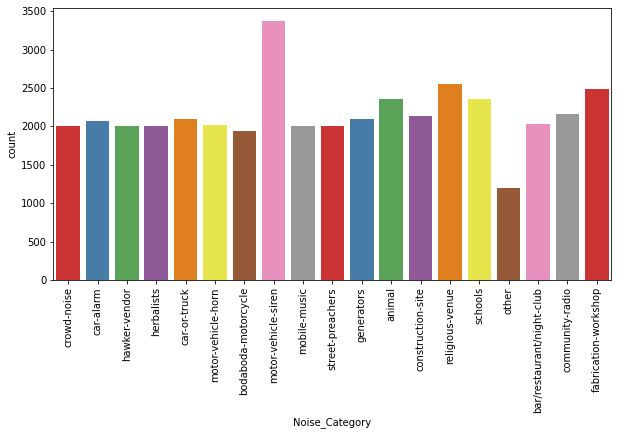

In [14]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=noise_data,
    x="Noise_Category",
    palette="Set1"
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.savefig("category-counts.png")

# Distance calculation

#### Pick out a specific category

In [24]:
category = "car-alarm"
category_data = noise_data[noise_data["Noise_Category"] == category]

#### Create a separate dataframe for easier viewing of distances

In [47]:
location_df = pd.DataFrame({
    "Latitude": category_data["Noise-Location-Latitude"],
    "Longitude": category_data["Noise-Location-Longitude"]
})

location_df.head()

,Latitude,Longitude
11,0.335949,32.564591
12,0.335947,32.564600
13,0.335878,32.564648
14,0.335931,32.564610
15,0.335895,32.564672


#### Calculate distances

In [48]:
point_of_ref = (0.3476, 32.5825)

In [49]:
def get_distance(point_of_ref, lat, lng):
    point = (lat, lng)
    return distance(point_of_ref, point).m

In [50]:
location_df["Distance from reference (metres)"] = location_df.apply(lambda row: get_distance(point_of_ref, row["Latitude"], row["Longitude"]), axis=1)
location_df.head()

,Latitude,Longitude,Distance from reference (metres)
11,0.335949,32.564591,2373.654033
12,0.335947,32.564600,2372.960774
13,0.335878,32.564648,2372.569944
14,0.335931,32.564610,2372.925570
15,0.335895,32.564672,2369.358494


# Payments calculation

In [22]:
noise_data["SubmissionDate"] = pd.to_datetime(noise_data["SubmissionDate"], format="%Y-%m-%d")

In [23]:
submitters = list(noise_data["SubmitterName"].unique())
submitters

['njoan',
 'musa',
 'oisaac',
 'ojulius',
 'cuthbert',
 'djoshua',
 'ncrispus',
 'ostephen',
 'eotim',
 'njohn',
 'snsumba']

In [25]:
def calculate_payment(submitter, date_range):
    # noise_data = noise_data[noise_data["SubmissionDate"] == date_range]
    num_submissions = noise_data[noise_data["SubmitterName"] == submitter].shape[0]
    payment = num_submissions * 300
    return payment

In [27]:
for submitter in submitters:
    payments = calculate_payment(submitter, "")
    print(payments)

1321800
3096600
1973400
1443300
1173300
388500
627600
523800
564900
302700
600
